# Importing the dataset

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
hr_data = pd.read_csv('train.csv')

In [125]:
hr_data.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


# EDA

In [126]:
hr_data.shape

(25491, 10)

In [127]:
hr_data.isnull().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
Department                0
salary                    0
Attrition                 0
dtype: int64

In [128]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [129]:
hr_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,25491.0,6.137704,2.486316,0.9,4.4,6.5,8.2,10.0
last_evaluation_rating,25491.0,7.167832,1.710754,3.6,5.6,7.2,8.7,10.0
projects_worked_on,25491.0,4.215174,1.324228,2.0,3.0,4.0,5.0,8.0
average_montly_hours,25491.0,205.286846,50.182916,96.0,160.0,204.0,249.0,320.0
time_spend_company,25491.0,3.497156,1.457715,2.0,3.0,3.0,4.0,10.0
Work_accident,25491.0,0.146012,0.353125,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,25491.0,0.021419,0.144780,0.0,0.0,0.0,0.0,1.0
Attrition,25491.0,0.234985,0.423998,0.0,0.0,0.0,0.0,1.0


In [130]:
hr_data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

We will combine "technical","support" and "IT" into one department as they are similar domain

In [131]:
hr_data['Department']=np.where(hr_data['Department'] =='support', 'technical', hr_data['Department'])
hr_data['Department']=np.where(hr_data['Department'] =='IT', 'technical', hr_data['Department'])

In [132]:
hr_data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [133]:
hr_data['Attrition'].value_counts()

0    19501
1     5990
Name: Attrition, dtype: int64

The dataset is imbalanced

In [134]:
hr_data['Department'].value_counts()

technical      10570
sales           6973
product_mng     1514
marketing       1455
RandD           1335
accounting      1316
hr              1261
management      1067
Name: Department, dtype: int64

In [135]:
hr_data.groupby('Attrition').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Attrition,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


It shows that they who have left, have lesser satisfaction level than they who haven't left. Their average montly work hours were more and also they have got lesser promotion.

In [136]:
hr_data.groupby('Department').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
Department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.034457,0.153558
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.018237,0.265957
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.021412,0.283902
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.111528,0.134958
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.050172,0.229553
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.000000,0.218626
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.023519,0.240212
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.008798,0.245317


This shows departmentwise information

In [137]:
hr_data.groupby('salary').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.060207,0.066792
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.008385,0.291945
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.028644,0.203156


This shows salary wise information

<AxesSubplot:>

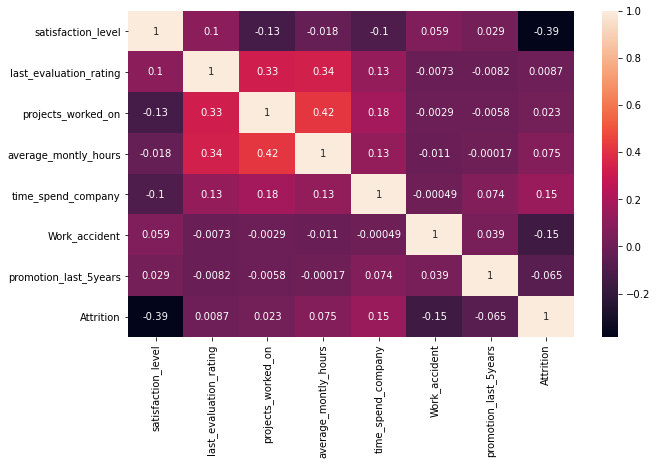

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(hr_data.corr(),annot=True)

It shows that employee attrition have comperatively higher correlation with time soent in company, average monthly hours and projects worked on

In [139]:
prop = pd.crosstab(hr_data.Department, hr_data.Attrition)
prop

Attrition,0,1
Department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


In [140]:
prop.columns

Int64Index([0, 1], dtype='int64', name='Attrition')

In [141]:
prop['proportion of employee left'] = prop[1] / (prop[0]+prop[1])

In [142]:
prop

Attrition,0,1,proportion of employee left
Department,,,
RandD,1130,205,0.153558
accounting,966,350,0.265957
hr,903,358,0.283902
management,923,144,0.134958
marketing,1121,334,0.229553
product_mng,1183,331,0.218626
sales,5298,1675,0.240212
technical,7977,2593,0.245317


It shows the number of employees left by department. Most number of employees have left from technical and sales department. Proportionwise, HR, Accounting, Sales and Technical are in top

<AxesSubplot:xlabel='Department', ylabel='count'>

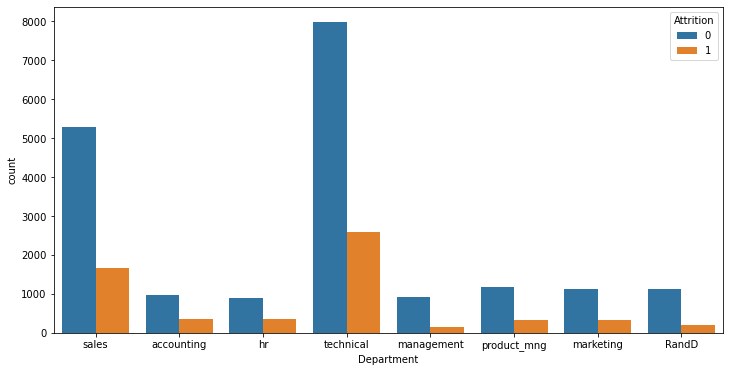

In [143]:
plt.figure(figsize=(12,6))
sns.countplot(x='Department', hue='Attrition', data=hr_data)

<AxesSubplot:xlabel='salary', ylabel='count'>

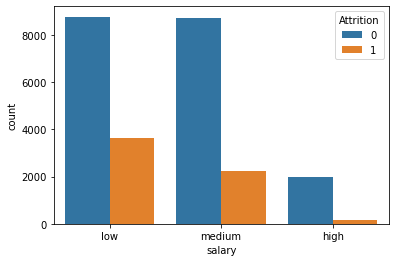

In [144]:
sns.countplot(x='salary', hue='Attrition', data=hr_data)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

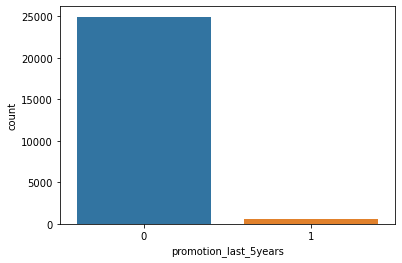

In [145]:
sns.countplot(x='promotion_last_5years', data=hr_data)

In last 5 years, employees have hardly get any promotion.

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

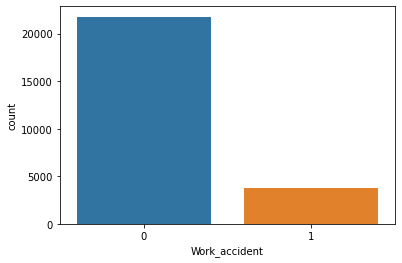

In [146]:
sns.countplot(x='Work_accident', data=hr_data)

Most of the employees haven't met any work accident

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='projects_worked_on', ylabel='Density'>

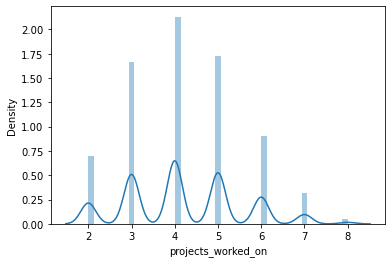

In [147]:
sns.distplot(hr_data['projects_worked_on'])

Emloyees who worked in projects have mostly worked in 3,4 or 5 projects

# Data Preprocessing

## One-hot encoding of the department column

In [148]:
department = pd.get_dummies(hr_data['Department'],drop_first=True)

In [149]:
department.head()

,accounting,hr,management,marketing,product_mng,sales,technical
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


## One-hot encoding of the salary column

In [150]:
salary = pd.get_dummies(hr_data['salary'],drop_first=True)

In [151]:
salary.head()

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [152]:
hr_data = pd.concat([hr_data,department,salary],axis=1)

In [153]:
hr_data.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition,accounting,hr,management,marketing,product_mng,sales,technical,low,medium
0,3.8,5.3,3,167,3,0,0,sales,low,1,0,0,0,0,0,1,0,1,0
1,8.0,8.6,6,272,6,0,0,sales,medium,1,0,0,0,0,0,1,0,0,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1,0,0,0,0,0,1,0,0,1
3,3.7,5.2,3,169,3,0,0,sales,low,1,0,0,0,0,0,1,0,1,0
4,4.1,5.0,3,163,3,0,0,sales,low,1,0,0,0,0,0,1,0,1,0


In [154]:
hr_data = hr_data.drop(['Department', 'salary'],axis=1)

In [155]:
hr_data.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition,accounting,hr,management,marketing,product_mng,sales,technical,low,medium
0,3.8,5.3,3,167,3,0,0,1,0,0,0,0,0,1,0,1,0
1,8.0,8.6,6,272,6,0,0,1,0,0,0,0,0,1,0,0,1
2,1.1,8.8,8,282,4,0,0,1,0,0,0,0,0,1,0,0,1
3,3.7,5.2,3,169,3,0,0,1,0,0,0,0,0,1,0,1,0
4,4.1,5.0,3,163,3,0,0,1,0,0,0,0,0,1,0,1,0


In [156]:
X = hr_data.drop('Attrition',axis=1).values
y = hr_data['Attrition'].values

## Train-test split

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [159]:
X_train

array([[ 5.4,  6.5,  3. , ...,  0. ,  0. ,  0. ],
       [ 5.4, 10. ,  3. , ...,  1. ,  0. ,  1. ],
       [ 6.8,  7.3,  5. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. ,  4.7,  7. , ...,  0. ,  1. ,  0. ],
       [ 0.9,  9.6,  7. , ...,  0. ,  1. ,  0. ],
       [ 7.7,  8.7,  6. , ...,  0. ,  0. ,  1. ]])

In [160]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

# Model Building

## KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

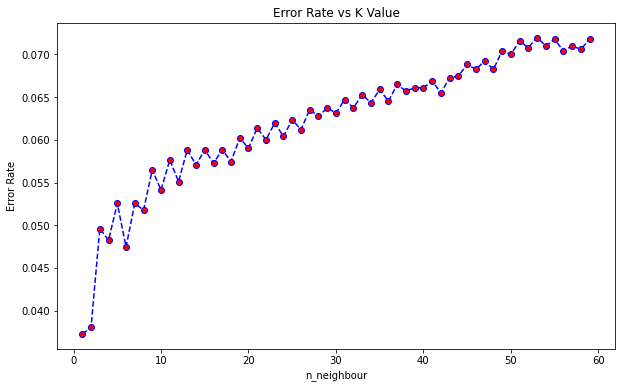

In [168]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('n_neighbour')
plt.ylabel('Error Rate')

In [169]:
knn = KNeighborsClassifier(n_neighbors=1)

In [170]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [172]:
from sklearn.metrics import confusion_matrix, classification_report

In [173]:
confusion_matrix(y_test, knn.predict(X_test))

array([[3730,  150],
       [  40, 1179]])

In [174]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3880
           1       0.89      0.97      0.93      1219

    accuracy                           0.96      5099
   macro avg       0.94      0.96      0.95      5099
weighted avg       0.96      0.96      0.96      5099



## Decision Tree 

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
dtc = DecisionTreeClassifier(criterion='entropy')

In [177]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [178]:
confusion_matrix(y_test, dtc.predict(X_test))

array([[3815,   65],
       [  26, 1193]])

In [179]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3880
           1       0.95      0.98      0.96      1219

    accuracy                           0.98      5099
   macro avg       0.97      0.98      0.98      5099
weighted avg       0.98      0.98      0.98      5099



### Cross Validation

In [121]:
from sklearn.model_selection import cross_val_score

In [122]:
accuracies = cross_val_score(estimator=dtc, X=X_train, y=y_train, cv=10)

In [123]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.15 %
Standard Deviation: 0.43 %


## Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rfc = RandomForestClassifier()

In [182]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [183]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[3875,    5],
       [  39, 1180]])

In [184]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3880
           1       1.00      0.97      0.98      1219

    accuracy                           0.99      5099
   macro avg       0.99      0.98      0.99      5099
weighted avg       0.99      0.99      0.99      5099



Important features considered by the Random Forest model and their level of importance:

In [203]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Attrition', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'technical', 'low', 'medium'])
importance = rfc.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

marketing-0.12%
management-0.14%
promotion_last_5years-0.15%
accounting-0.17%
Attrition-0.17%
hr-0.20%
product_mng-0.35%
low-0.38%
sales-0.43%
technical-0.87%
Work_accident-1.12%
projects_worked_on-11.64%
last_evaluation_rating-13.93%
average_montly_hours-14.60%
time_spend_company-19.78%
satisfaction_level-35.96%


### Hyperparameter Tuning and Cross Validation

In [185]:
from sklearn.model_selection import RandomizedSearchCV

In [186]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap':[True, False]}

In [187]:
ran_cv = RandomizedSearchCV(estimator=rfc, param_distributions=parameters, cv=5, n_jobs=-1, verbose=2)

In [188]:
ran_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [189]:
confusion_matrix(y_test, ran_cv.predict(X_test))

array([[3873,    7],
       [  40, 1179]])

In [190]:
print(classification_report(y_test, ran_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3880
           1       0.99      0.97      0.98      1219

    accuracy                           0.99      5099
   macro avg       0.99      0.98      0.99      5099
weighted avg       0.99      0.99      0.99      5099



## XGB

In [191]:
from xgboost import XGBClassifier

In [192]:
xgb = XGBClassifier()

In [193]:
xgb.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [194]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[3866,   14],
       [  43, 1176]])

In [195]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3880
           1       0.99      0.96      0.98      1219

    accuracy                           0.99      5099
   macro avg       0.99      0.98      0.98      5099
weighted avg       0.99      0.99      0.99      5099



### Hyperparameter Tuning and Cross Validation

In [196]:
parameters = {'max_depth': np.arange(2, 12, 2),  
              'alpha': [0, .001, .01, .1],
              'learning_rate': np.linspace(0.001, 0.6, 15),
              'colsample_bytree': np.linspace(0.1, 1, 5),
              'subsample': np.linspace(0.25, 1, 15),
              'n_estimators': np.arange(10, 200, 15),
              'min_child_weight':[1,3,5]}

In [197]:
xgb_ran_cv = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, cv=5, verbose=2, n_jobs=1)

In [198]:
xgb_ran_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.6785714285714286, n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.001, colsample_bytree=0.775, alpha=0.1 
[18:03:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  subsample=0.6785714285714286, n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.001, colsample_bytree=0.775, alpha=0.1, total=   1.9s
[CV] subsample=0.6785714285714286, n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.001, colsample_bytree=0.775, alpha=0.1 
[18:03:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  subsample=0.6785714285714286, n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.001, colsample_bytree=0.775, alpha=0.1, total=   1.8s
[CV] subsample=0.6785714285714286, n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.001, colsample_bytree=0.775, alpha=0.1 
[18:03:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.6785714285714286, n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.001, colsample_bytree=0.775, alpha=0.1, total=   2.1s
[CV] subsample=0.6785714285714286, n_estimators=175, min_child_weight=3, max_depth=6, learning_rate=0.001, colsample_bytree=0.775, alpha=0.1 
[18:03:16] WARNING: /opt/concourse/worker

[CV]  subsample=0.8928571428571428, n_estimators=175, min_child_weight=3, max_depth=4, learning_rate=0.04378571428571428, colsample_bytree=0.775, alpha=0.001, total=   1.3s
[CV] subsample=0.4107142857142857, n_estimators=10, min_child_weight=1, max_depth=6, learning_rate=0.17214285714285713, colsample_bytree=0.775, alpha=0.1 
[18:03:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.4107142857142857, n_estimators=10, min_child_weight=1, max_depth=6, learning_rate=0.17214285714285713, colsample_bytree=0.775, alpha=0.1, total=   0.1s
[CV] subsample=0.4107142857142857, n_estimators=10, min_child_weight=1, max_depth=6, learning_rate=0.17214285714285713, colsample_bytree=0.77

[CV]  subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=2, learning_rate=0.3860714285714285, colsample_bytree=0.325, alpha=0.1, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=2, learning_rate=0.3860714285714285, colsample_bytree=0.325, alpha=0.1 
[18:03:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=2, learning_rate=0.3860714285714285, colsample_bytree=0.325, alpha=0.1, total=   0.1s
[CV] subsample=0.30357142857142855, n_estimators=175, min_child_weight=1, max_depth=6, learning_rate=0.3860714285714285, colsample_bytree=0.325, alpha=0.01 
[18:03:31] WARNING: /opt/concourse/

[CV]  subsample=0.25, n_estimators=130, min_child_weight=3, max_depth=6, learning_rate=0.3005, colsample_bytree=0.325, alpha=0.1, total=   0.9s
[CV] subsample=0.25, n_estimators=130, min_child_weight=3, max_depth=6, learning_rate=0.3005, colsample_bytree=0.325, alpha=0.1 
[18:03:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.25, n_estimators=130, min_child_weight=3, max_depth=6, learning_rate=0.3005, colsample_bytree=0.325, alpha=0.1, total=   0.7s
[CV] subsample=0.25, n_estimators=130, min_child_weight=3, max_depth=6, learning_rate=0.3005, colsample_bytree=0.325, alpha=0.1 
[18:03:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/v

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.2s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
       0.42885714, 0.47164286, 0.51442857, 0.55721429, 0.6       ]),
                                        'max_depth': array([ 2,  4,

In [199]:
confusion_matrix(y_test, xgb_ran_cv.predict(X_test))

array([[3861,   19],
       [  43, 1176]])

In [200]:
print(classification_report(y_test, xgb_ran_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3880
           1       0.98      0.96      0.97      1219

    accuracy                           0.99      5099
   macro avg       0.99      0.98      0.98      5099
weighted avg       0.99      0.99      0.99      5099



Important features considered by the XGBoost model and their level of importance:

In [205]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Attrition', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'technical', 'low', 'medium'])
importance = xgb.feature_importances_
for index in importance.argsort():
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-1.18%
management-1.55%
product_mng-1.70%
accounting-1.97%
marketing-2.00%
sales-2.03%
low-2.13%
Attrition-2.33%
technical-2.49%
hr-2.84%
Work_accident-4.63%
average_montly_hours-5.40%
last_evaluation_rating-9.28%
projects_worked_on-16.03%
time_spend_company-22.01%
satisfaction_level-22.44%


## In conclusion we

Loaded the dataset.

Did Exploratory Data Analysis.

Processed the data, did label encoding for categorical features.

Built Decision Tree, Random Forest and XGBoost classification models to predict the attrition.

Optimized the models with hyperparameter tuning using RandomizedSearchCV.

Random Forest model fits the best with the dataset with a precision of 0.99 and accuracy of 0.99.